In [1]:
import pandas as pd
from konlpy.tag import Kkma
from tqdm import tqdm
from konlpy.tag import Okt
import numpy as np

In [2]:
file1='data/3부 여자 트레이닝 반바지 숏팬츠 돌핀팬츠 랍빠(236).csv'
file2='data/4부 헬스 반바지 스쿼트팬츠 트레이닝 바지(1157).csv'
file3='data/나이키 남자 레깅스 트레이닝 프로 타이즈 반바지 쇼츠(549).csv'
file4='data/나이키 아디다스 트레이닝복 긴바지 클럽 조거팬츠 삼선 남성트레이닝 운동복(917).csv'
file5='data/남녀공용 세미 와이드 트레이닝 팬츠 커플 통큰 츄리닝 바지 운동복 회색 빅사이즈 홈웨어(304).csv'
file6='data/남성 봄 겨울 츄리닝 트레이닝 바지 체육복 운동(540).csv'
file7='data/남성 쿨링 조거 트레이닝팬츠 여름용 겨울용(116).csv'
file8='data/남자 트레이닝 츄리닝 체육복 빅사이즈 조거 바지 M-5XL(853).csv'
file9='data/밀도 밴딩 트레이닝 헬스 운동 츄리닝 반바지 (빅사이즈, 남녀공용)(399).csv'
file10='data/알칸스 가을 남자 트레이닝바지 남성 츄리닝팬츠 운동복 37종(159).csv'
file11='data/남자 트레이닝 츄리닝 일자 조거 카고 기모 운동복 세트 빅사이즈 바지 M-5XL(394).csv'
file12='data/후드티 남자 트레이닝 세트 기모 봄가을 8컬러(244).csv'
file13='data/남성 트레이닝 바지 남자 운동복 조거 일자 카고 특양면 츄리닝 빅사이즈(124).csv'
file14='data/(국내 매장판)나이키 테크팩 플리스 트레이닝 풀집 후디 후드 맨투맨 조거 팬츠(133).csv'
file15='data/남자 트리코트 트레이닝 바지 헬스 운동복 짐웨어 런닝복 조깅 스포츠 츄리닝 조거 팬츠(360).csv'
file16='traingsuit.csv'

In [3]:
df1=pd.read_csv(file1, header=2)
df2=pd.read_csv(file2, header=2, encoding='utf-8')
df3=pd.read_csv(file3, header=2)
df4=pd.read_csv(file4, header=2)
df5=pd.read_csv(file5, header=2)
df6=pd.read_csv(file6, header=2)
df7=pd.read_csv(file7, header=2)
df8=pd.read_csv(file8, header=2)
df9=pd.read_csv(file9, header=2)
df10=pd.read_csv(file10, header=2)
df11=pd.read_csv(file11, header=2)
df12=pd.read_csv(file12, header=2)
df13=pd.read_csv(file13, header=2)
df14=pd.read_csv(file14, header=2)
df15=pd.read_csv(file15, header=2)
df16=pd.read_csv(file16)

In [4]:
# 데이터프레임을 행 방향으로 합치기
finaldf = pd.concat([df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12, df13, df14, df15, df16], axis=0)

# 결과 확인
finaldf=finaldf[['리뷰내용', '리뷰점수']]
finaldf

,리뷰내용,리뷰점수
0,제가 살이 많이 쪄서 프리사이즈다 보니 안 맞을줄 알았는데 착용했더니 너무 편안하게...,5
1,원래 입던 반바지가 낡아서 새로 하나 사려던 중에 여기가 제일 나아보여서 여기서 구...,5
2,이뻐요 편하고 !! 가성비 너무 좋아요 또 구매하러 올게요,5
3,잘 맞고 가격 저렴한데 퀄리티 되게 만족스러워요 편하고 예쁘고 최고입니다 ~~\n머...,5
4,"요가복 하의 위에 입을 반바지를 찾다가 구매평도 좋고 금액도 착해서 핑크, 하늘 ...",5
...,...,...
59995,신랑이편하고이쁘자해용,4
59996,가격대비 상품 좋음.편하고 가볍고 구김도 잘 안가는 듯,5
59997,좋네요 좋아 굿 굿,3
59998,생각보다 색상 퀄리티 좋아서 대만족햇습니다,5


In [5]:
finaldf['리뷰점수'].unique()

array([5, 4, 2, 3, 1], dtype=int64)

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# 데이터 전처리
X = finaldf['리뷰내용']
y = finaldf['리뷰점수']

# 훈련 세트와 테스트 세트로 나누기
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2, 
                                                    random_state=42)

# 텍스트 데이터를 TF-IDF로 변환
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# 선형 회귀 모델 생성과 훈련
model = LinearRegression()
model.fit(X_train_tfidf, y_train)

# 테스트 세트로 예측
y_pred = model.predict(X_test_tfidf)

# 모델 평가
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 0.501067492549371


In [12]:
new_review = ["""가격이 싸요. 
핏이 딱맞아요. 
예뻐요"""]  # 리스트로 감싸야 합니다.
new_review_tfidf = vectorizer.transform(new_review)

# 모델을 사용하여 예측
predicted_rating = model.predict(new_review_tfidf)

print(f"예측된 리뷰평점: {predicted_rating}")

예측된 리뷰평점: [4.17094398]


In [11]:
new_review =["""너무 칙칙해요. 
두꺼워요. 
비싸요. 
별로에요."""]
new_review_tfidf = vectorizer.transform(new_review)

# 모델을 사용하여 예측
predicted_rating = model.predict(new_review_tfidf)

print(f"예측된 리뷰평점: {predicted_rating}")

예측된 리뷰평점: [1.73952851]


In [13]:
new_review =["""좋은데 배달이 느려요.
괜찮은데 사진보다 좀 작네요.
예쁜데 오래입진 못하겠네요"""]
new_review_tfidf = vectorizer.transform(new_review)

# 모델을 사용하여 예측
predicted_rating = model.predict(new_review_tfidf)

print(f"예측된 리뷰평점: {predicted_rating}")

예측된 리뷰평점: [3.15300123]


In [15]:
from konlpy.tag import Kkma
from konlpy.tag import Okt
import re

okt=Okt()
kkma=Kkma()

def make_df(df1):

    total = []
    for i in tqdm(df1['리뷰내용']):
        # 이모지 빼기
        t = okt.normalize(i)
        t = " ".join(re.findall("[a-zA-Z가-힣0-9]+", t))  # 수정된 정규표현식
        t = kkma.pos(t)
    
        box = []
        for j in t:
            if j[1] in ['NNG', 'NNP', 'VA'] and len(j[0]) > 1:  # 명사와 형용사 선택하고 길이가 1 이상인 단어만 포함
                box.append(j[0])
        total.append(" ".join(box))
    
    total = ' '.join(total)
    return total

In [16]:
tDF = pd.DataFrame({'내용': [make_df(finaldf)]})
tDF

100%|█████████████████████████████████████████████████████████████████████████| 105000/105000 [17:09<00:00, 102.04it/s]


,내용
0,제가 살이 프리 사이즈 착용 편안 하비 편하 착용 신축성 고무줄 밴딩 아프 돌핀 팬...


In [17]:
tDF.to_csv('트레이닝복통합.csv')

In [18]:
from collections import Counter
from konlpy.tag import Komoran

# Create Komoran morpheme analyzer
komoran = Komoran()

# Define a function to extract nouns from text
def extract_nouns(text):
    nouns = komoran.nouns(text)
    # Exclude single-character nouns
    nouns = [noun for noun in nouns if len(noun) > 1]
    return nouns
# 1에 해당하는 행들만 선택
# high_rows = tDF[tDF['내용']]




In [22]:
from tqdm import tqdm

# 한글 텍스트 데이터 예시
text_data = tDF['내용']

# 명사 추출
nouns = []
for text in tqdm(text_data):
    nouns.extend(okt.nouns(text))

# 단어 빈도 계산
word_counts = Counter(nouns)

# 상위 50개 단어 추출
top_50_words = word_counts.most_common(20)

# 결과 출력
print("상위 50개 단어:", top_50_words)

100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:12<00:00, 12.18s/it]

상위 50개 단어: [('구매', 13572), ('사이즈', 12074), ('배송', 11959), ('만족', 9403), ('가격', 8275), ('감사', 5679), ('바지', 5607), ('성비', 5598), ('생각', 4481), ('여름', 4209), ('재질', 4073), ('주문', 3968), ('대비', 3648), ('제품', 3494), ('운동', 3395), ('길이', 3180), ('색상', 3109), ('착용', 2519), ('구입', 2338), ('최고', 2282)]


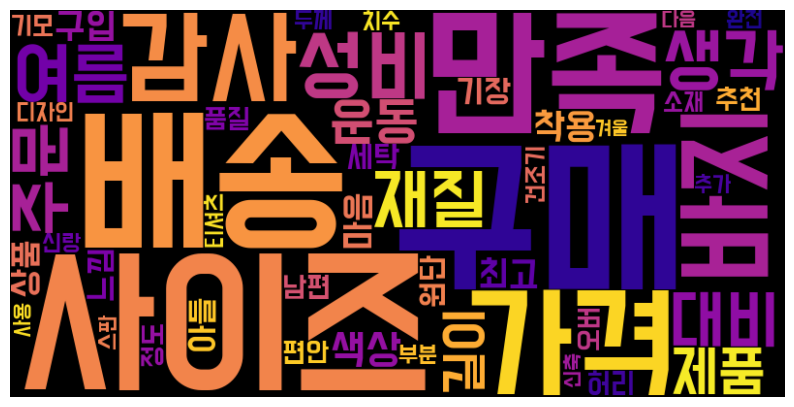

In [21]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

font_path = "BMDOHYEON_ttf.ttf"

wordcloud = WordCloud(
    font_path=font_path,  # 한글 폰트 경로 지정
    width=800,
    height=400,
    background_color='black',  # 배경색을 흰색으로 설정
    colormap='plasma',  # 색상 맵 지정
    max_words=50  # 표시할 최대 단어 수
)

# 판매량 높은 명사 빈도를 이용하여 워드클라우드 생성
# 한글 폰트를 지정한 후, wordcloud에 빈도 정보를 전달합니다
wordcloud.generate_from_frequencies(frequencies=word_counts)

# 워드클라우드를 표시
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()
